In [ ]:
# Load once
import sys
import os
import mne
import numpy as np
import pickle
# Add the workspace root to the Python path
mne.set_log_level('WARNING')  # Set MNE log level to WARNING to reduce output noise
workspace_root = os.path.abspath("..")

if workspace_root not in sys.path:
    sys.path.append(workspace_root)

from config import data_path
from functions import preprocess, interpolate_HANoise

# Load once
with open(os.path.join(data_path, 'bridged_channels_analysis.pkl'), "rb") as f:
    all_bridged_channels = pickle.load(f)
with open(os.path.join(data_path, 'artifacts.pkl'), "rb") as f:
    all_bads = pickle.load(f)

path_concat = os.path.join(workspace_root, 'Data', f'groupData4.fif')  
concat_data = mne.io.read_raw_fif(path_concat, preload=True)

c:\Users\gmoha\Downloads\git\preprocessing_pipline\functions.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz_data = pd.read_csv(ch_location_path, delim_whitespace=True, skiprows=1, header=None)
c:\Users\gmoha\Downloads\git\preprocessing_pipline\functions.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz_data = pd.read_csv(ch_location_path, delim_whitespace=True, skiprows=1, header=None)
C:\Users\gmoha\AppData\Local\Temp\ipykernel_11656\1465725165.py:73: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\preprocessing_pipline\Data\S601_ica_infomax.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica = mne.preprocessing.read_ica(ica_path)


In [34]:
events, event_id = mne.events_from_annotations(concat_data)

tmin, tmax = 0, 1.5  # in seconds, relative to annotation onset

# 11. create the Epochs object
epochs = mne.Epochs(
    concat_data,
    events,
    event_id=event_id,
    tmin=tmin,
    tmax=tmax,
    baseline=None,      # e.g. baseline‐correct to the pre‐onset period
    preload=True,
)

In [36]:
ICA_path = os.path.join(workspace_root, 'Data', f'gICA_4.fif')
ica = mne.preprocessing.read_ica( ICA_path) 

C:\Users\gmoha\AppData\Local\Temp\ipykernel_11656\2368467836.py:2: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\preprocessing_pipline\Data\gICA_4.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica = mne.preprocessing.read_ica( ICA_path)


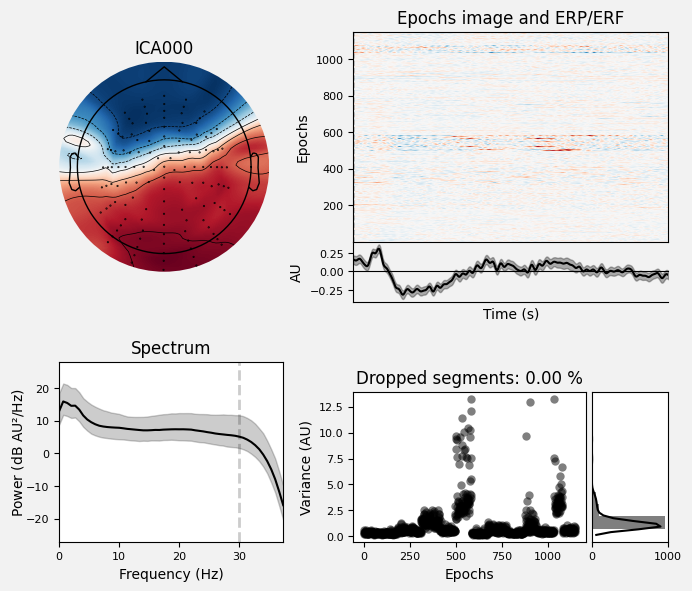

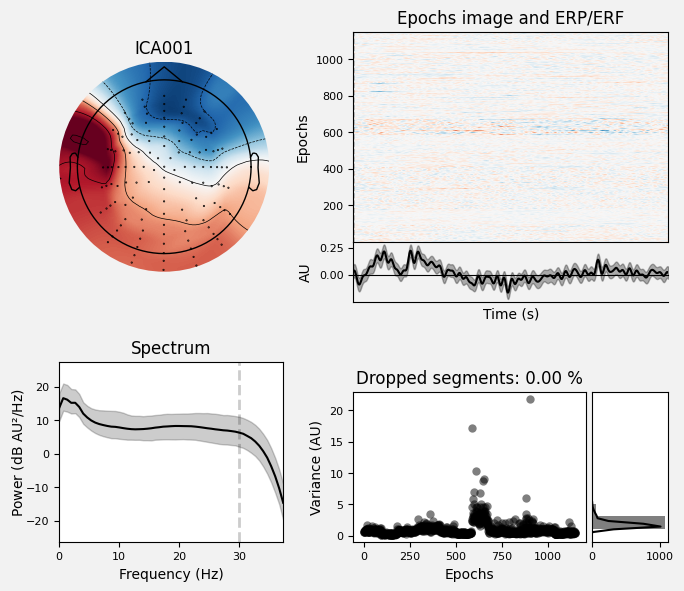

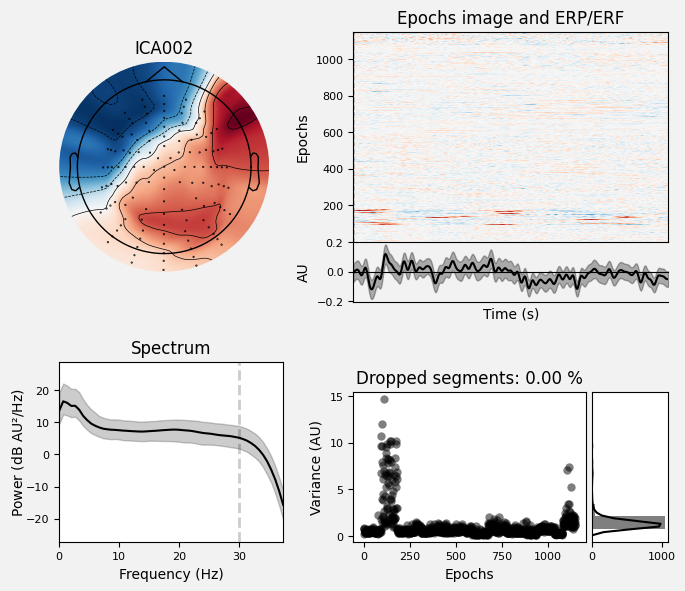

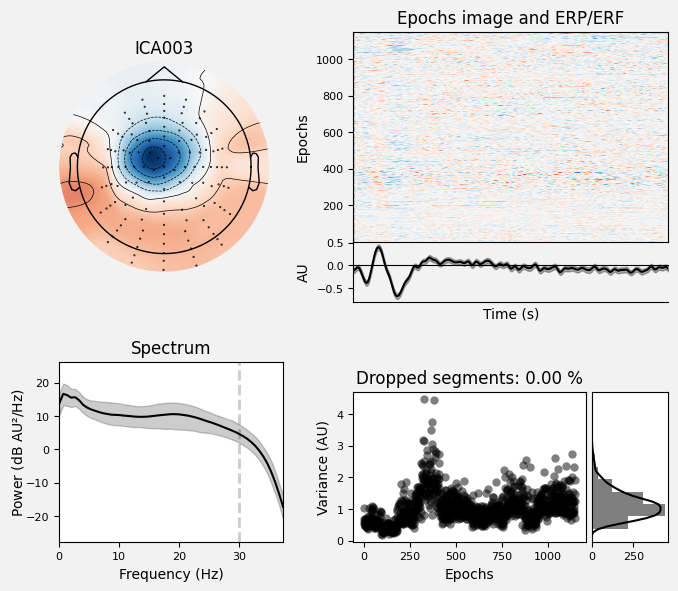

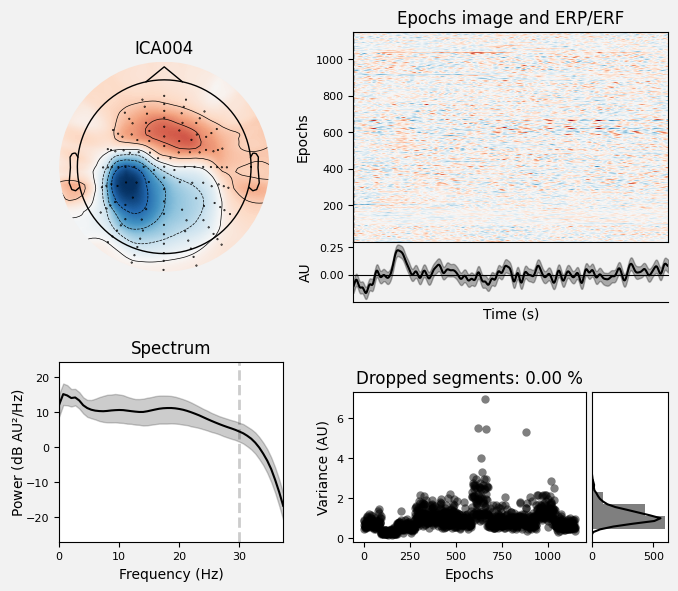

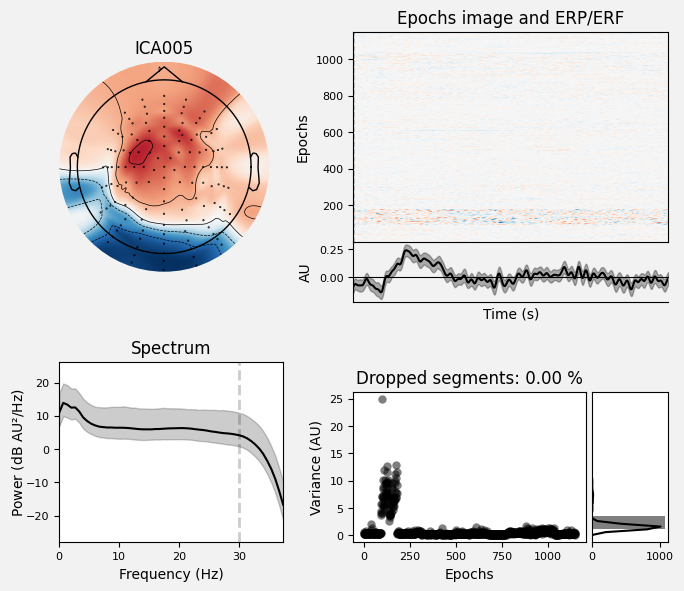

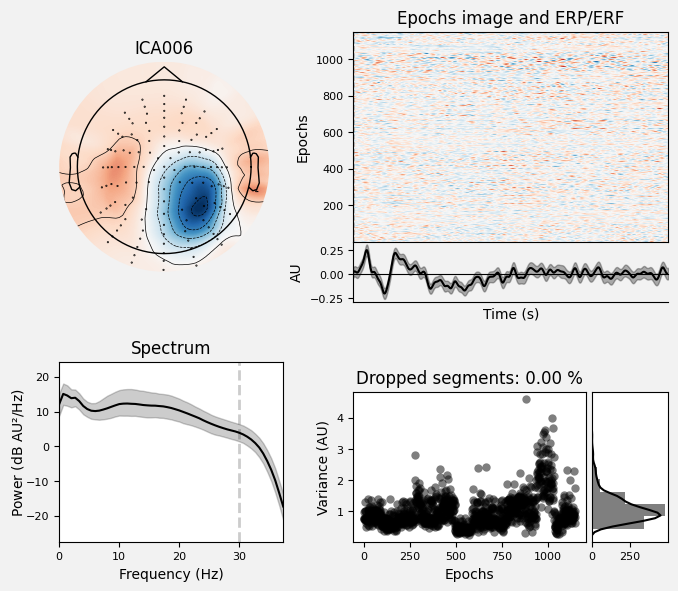

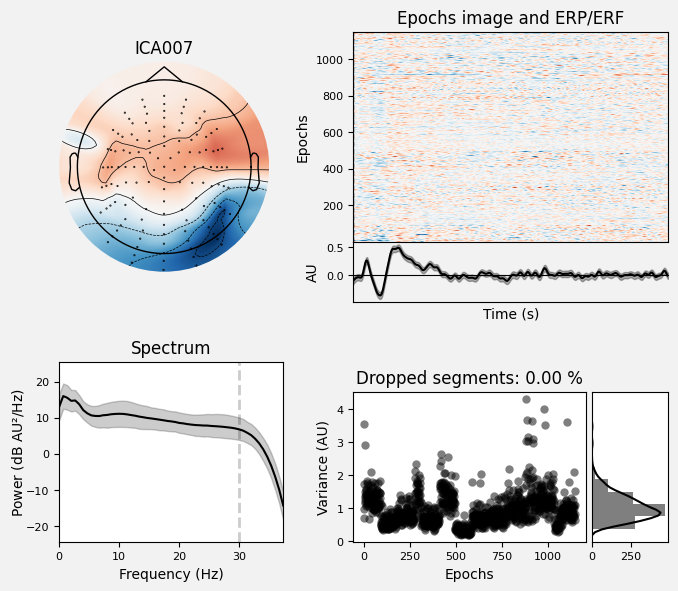

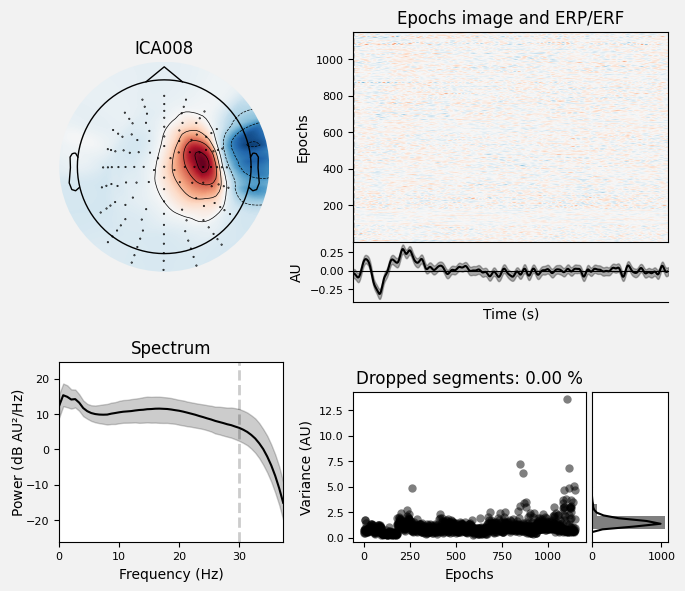

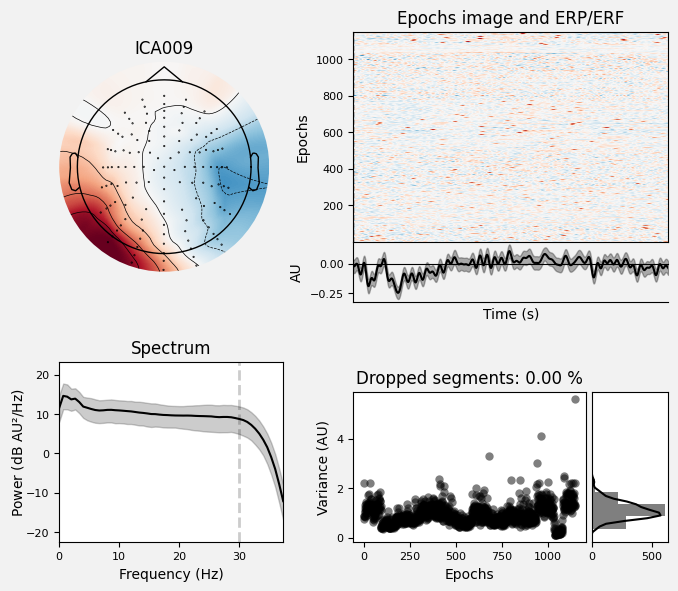

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [39]:
%matplotlib inline
ica.plot_properties(inst=epochs, picks= range(0,10) )